First, import needed modules

In [14]:
import numpy as np
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt

Initalize variables

In [15]:
path = os.getcwd()
print(path)

/Users/jan/Dropbox/UP_EPQM/2222/MA/powerlinemonsters


Load datasets

In [16]:
pl_05 = gpd.read_file(f'{path}/data/geodata/powerlines_05.shp')
pl_09 = gpd.read_file(f'{path}/data/geodata/powerlines_09.shp')
pl_13 = gpd.read_file(f'{path}/data/geodata/powerlines_13.shp')
all_powerlines = gpd.read_file(f'{path}/data/geodata/all_powerlines.shp')
municipalities = gpd.read_file(f'{path}/data/geodata/municipalities.shp')
mun_unincorporated = gpd.read_file(f'{path}/data/geodata/unincorporated.shp')
states = gpd.read_file(f'{path}/data/geodata/VG250_LAN.shp')

Combine municipalities and powerlines in a plot

In [17]:
# 2005
pl_05.set_geometry('geometry')
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
ax.set_aspect('equal')
ax.set_axis_off()
municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
states.boundary.plot(ax=ax, color='black', lw = 0.1, zorder=2)
pl_05.plot(ax=ax, color='red', lw=2, zorder=3)
plt.title('DENA 2005 projects \n All projects (new and retrofit)', fontsize=20)
plt.savefig(f'{path}/figures/treatments/DENA2005_all_projects.png')
plt.close()

In [18]:
# 2009
pl_09.set_geometry('geometry')
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
ax.set_aspect('equal')
ax.set_axis_off()
municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
states.boundary.plot(ax=ax, color='black', lw = 0.1, zorder=2)
pl_09.plot(ax=ax, color='red', lw=2, zorder=3)
plt.title('ENLAG 2009 projects \n All projects (new and retrofit)', fontsize=20)
plt.savefig(f'{path}/figures/treatments/ENLAG2009_all_projects.png')
plt.close()

In [19]:
# 2013
pl_13.set_geometry('geometry')
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
ax.set_aspect('equal')
ax.set_axis_off()
municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
states.boundary.plot(ax=ax, color='black', lw = 0.1, zorder=2)
pl_13.plot(ax=ax, color='red', lw=2, zorder=3)
plt.title('BBPlG 2013 projects \n All projects (new and retrofit)', fontsize=20)
plt.savefig(f'{path}/figures/treatments/BBPLG2013_all_projects.png')
plt.close()

Combine municipalities and ALL new powerlines in a plot

In [20]:
all_powerlines.set_geometry('geometry')
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
ax.set_aspect('equal')
ax.set_axis_off()
municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
states.boundary.plot(ax=ax, color='black', lw = 0.1, zorder=2)
all_powerlines.plot(ax=ax, column='descriptio', cmap='viridis', legend=True, lw=2, zorder=3)
plt.title('All powerline projects \n (DENA, ENLAG & BBPlG)', fontsize=20)
plt.savefig(f'{path}/figures/treatments/All_projects.png')
plt.close()

Plot municipalities that intersect with a powerline

In [ ]:
municipalities.columns

Index(['AGS', 'GEN', 't2005', 'treatment_', 't2014', 't2010', 'never_trea',
       'geometry'],
      dtype='object')

In [ ]:
# ALL
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
ax.set_aspect('equal')
ax.set_axis_off()
municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
states.boundary.plot(ax=ax, color='darkblue', lw = 0.1, zorder=2)
municipalities.plot(column='t2014', ax=ax, edgecolor='darkorange', lw=0.01, zorder=3, legend=True, cmap='viridis')
all_powerlines.plot(ax=ax, column='descriptio', cmap='copper', lw=2, zorder=4)
plt.title('Municipalities affected by DENA, ENLAG and BBPlG projects', fontsize=20)
#ax.annotate('Source: Rajasthan Datastore, 2019',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
plt.savefig(f'{path}/figures/treatments/All_treatments.png')
plt.close()

KeyboardInterrupt: 

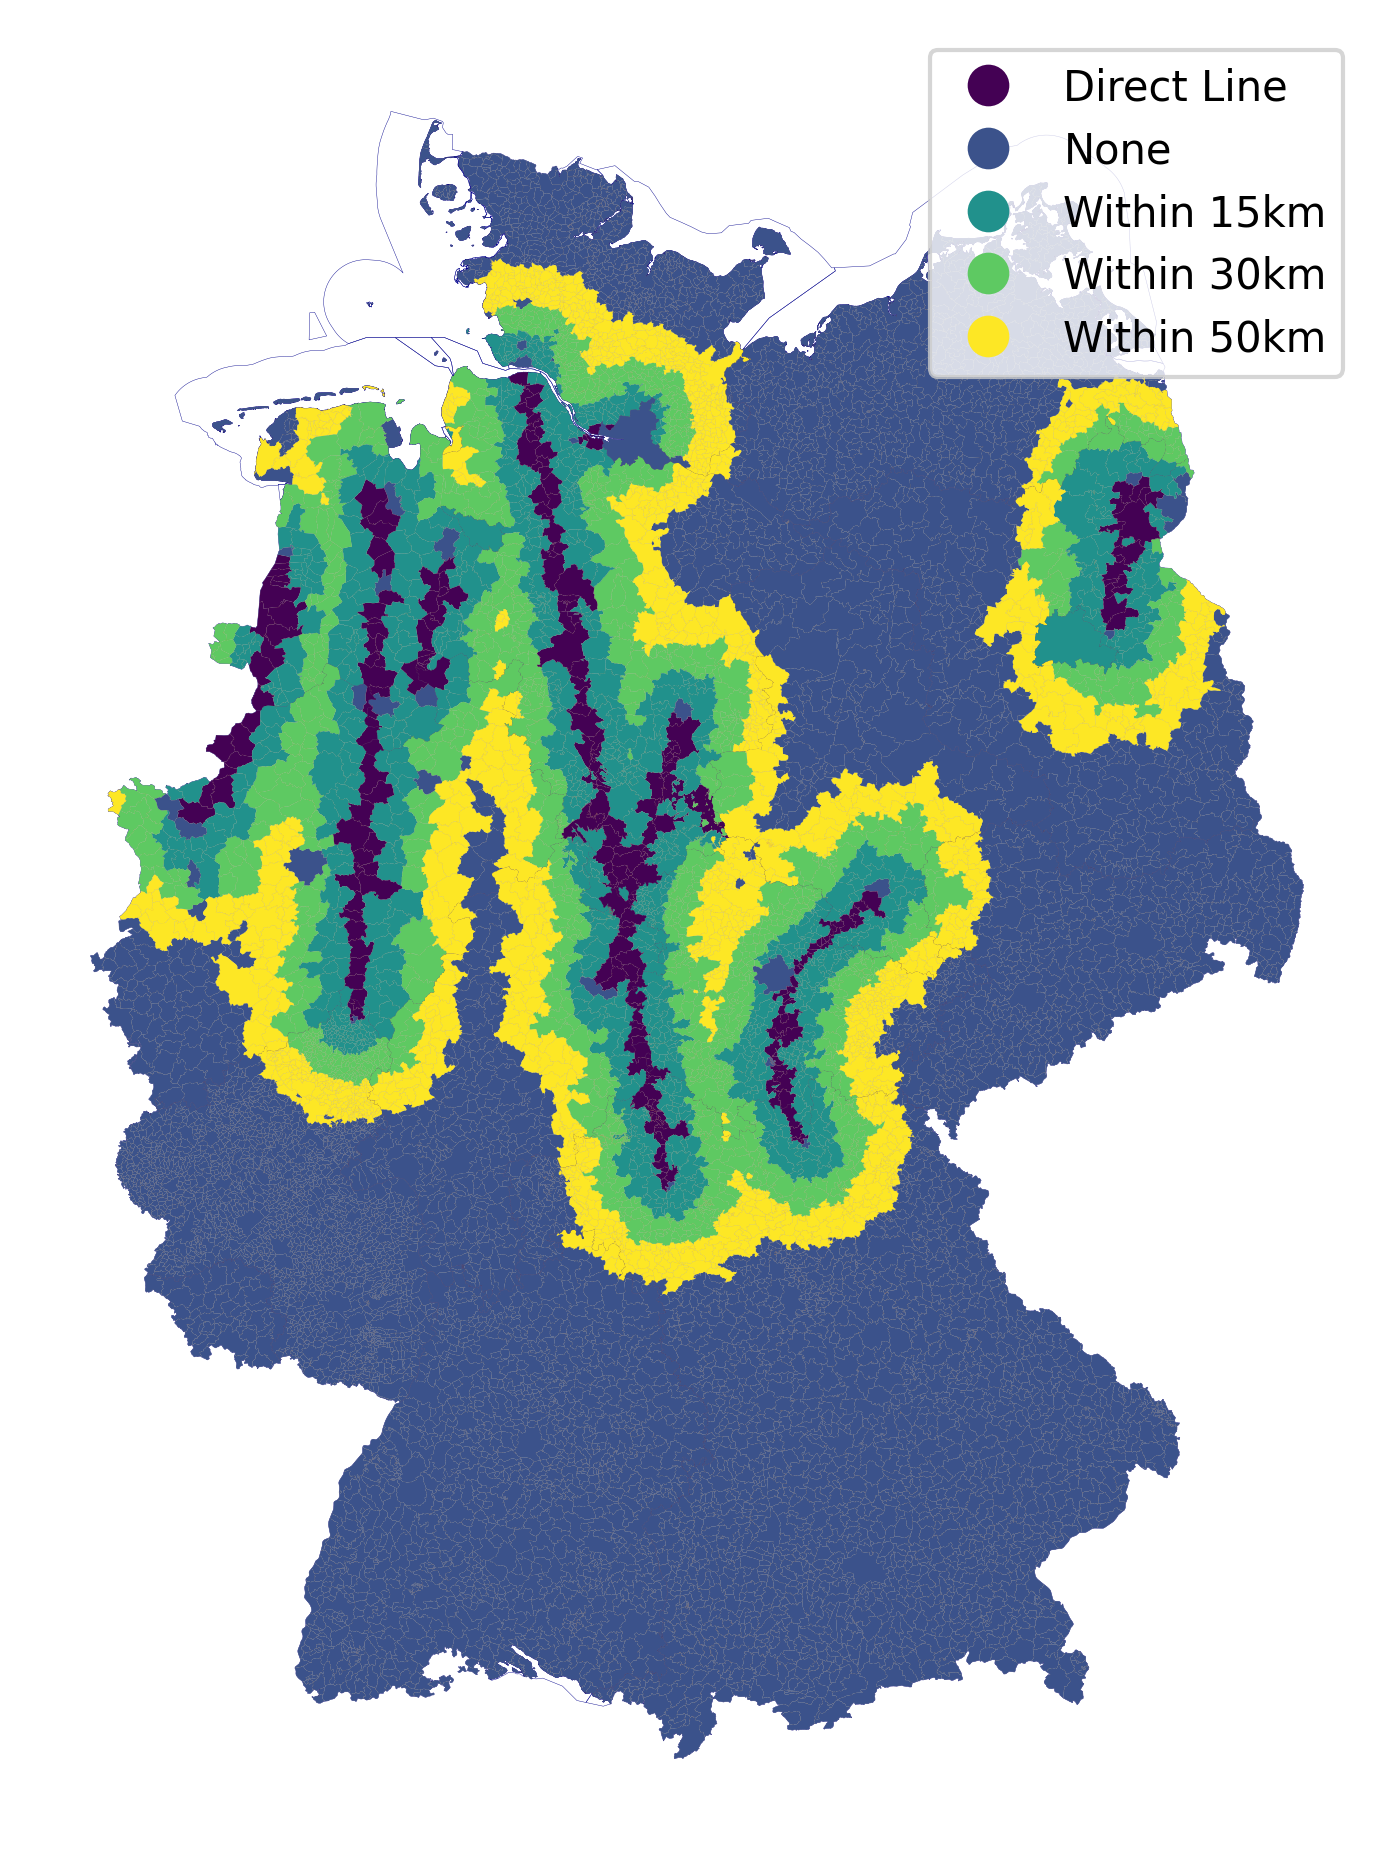

In [ ]:
# 2005
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
ax.set_aspect('equal')
ax.set_axis_off()
municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
states.boundary.plot(ax=ax, color='darkblue', lw = 0.1, zorder=2)
municipalities.plot(column='t2005', ax=ax, edgecolor='darkorange', lw=0.01, zorder=3, legend=True, cmap='viridis')
pl_05 = pl_05.set_geometry('geometry_0')
pl_05.plot(ax=ax, color='red', lw=2, zorder=4)
plt.title('Municipalities affected by DENA 2005 projects', fontsize=20)
#ax.annotate('Source: Rajasthan Datastore, 2019',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
plt.savefig(f'{path}/figures/treatments/DENA2005_treatments.png')
plt.close()

In [ ]:
# 2009
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
ax.set_aspect('equal')
ax.set_axis_off()
municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
states.boundary.plot(ax=ax, color='darkblue', lw = 0.1, zorder=2)
municipalities.plot(column='t2009', ax=ax, edgecolor='darkorange', lw=0.01, zorder=3, legend=True, cmap='viridis')
pl_09 = pl_09.set_geometry('geometry_0')
pl_09.plot(ax=ax, color='red', lw=2, zorder=4)
plt.title('Municipalities affected by ENLAG 2009 projects', fontsize=20)
#ax.annotate('Source: Rajasthan Datastore, 2019',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
plt.savefig(f'{path}/figures/treatments/ENLAG2009_treatments.png')
plt.close()

In [ ]:
# 2013
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
ax.set_aspect('equal')
ax.set_axis_off()
municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
states.boundary.plot(ax=ax, color='darkblue', lw = 0.1, zorder=2)
municipalities.plot(column='t2013', ax=ax, edgecolor='darkorange', lw=0.01, zorder=3, legend=True, cmap='viridis')
pl_13 = pl_13.set_geometry('geometry_0')
pl_13.plot(ax=ax, color='red', lw=2, zorder=4)
plt.title('Municipalities affected by BBPlG 2013 projects', fontsize=20)
#ax.annotate('Source: Rajasthan Datastore, 2019',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
plt.savefig(f'{path}/figures/treatments/BBPLG2013_treatments.png')
plt.close()

In [ ]:
# All years in one
legend_dict = {2005: 'DENA 2005', 2010: 'EnLAG 2009', 2014: 'BBPlG 2013'}
all_powerlines['year'] = all_powerlines['year'].astype(int)
# initialize figure 
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 10), dpi=300, constrained_layout=True)
# title for entire figure
fig.suptitle('Treated municipalities by year', fontsize=20)
for i, (year, desc) in enumerate(legend_dict.items()):
    # subset powerlines
    plot_pl = all_powerlines[all_powerlines['year'] <= year]
    plot_pl = plot_pl.sort_values('year')
    #plot_pl['year'] = plot_pl['year'].astype(str)        
    # draw subfig
    ax[i].set_aspect('equal')
    ax[i].set_adjustable('datalim', share=True)
    ax[i].set_axis_off()
    ax[i].set_title(f'{desc}')
    if year >= 2005 and year < 2010:
        municipalities.plot(ax=ax[i], column='t2005', cmap='viridis', legend=True, edgecolor='darkblue', lw=0.01, zorder=1)
    if year >= 2010 and year < 2014:
        municipalities.plot(ax=ax[i], column='et2010', cmap='viridis', legend=True, edgecolor='darkblue', lw=0.01, zorder=1)
    if year >= 2014:
        municipalities.plot(ax=ax[i], column='et2014', cmap='viridis', legend=True, edgecolor='darkblue', lw=0.01, zorder=1)
    plot_pl.plot(ax=ax[i], column='descriptio', cmap='winter', legend=False, lw=2, zorder=2)
    # replace legend
    def replace_legend_items(legend, mapping):
        for txt in legend.texts:
            for k,v in mapping.items():
                if txt.get_text() == str(k):
                    txt.set_text(v)
    #replace_legend_items(ax[i].get_legend(), legend_dict)
# remove individual legends and add common 
#lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
#lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
#fig.legend(lines, labels)
#[r.get_legend().remove()for r in ax]
plt.savefig(f'{path}/figures/treatments/all_treatments_by_year.png', bbox_inches="tight", pad_inches=0)
plt.close()

Plot a map of uninc. areas and powerlines

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
ax.set_aspect('equal')
ax.set_axis_off()
municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
mun_unincorporated.plot(ax=ax, color='green', edgecolor='green', lw=0.01, zorder=2)
states.boundary.plot(ax=ax, color='black', lw = 0.1, zorder=3)
all_powerlines.plot(ax=ax, color='red', lw=2, zorder=4)
plt.title('Unicorporated and uninhabited areas in Germany', fontsize=20)
plt.savefig(f'{path}/figures/treatments/unincorporated areas.png')
plt.close()